In [1]:
import pandas as pd

In [2]:
#df=pd.read_csv('ABEV3.Diario.csv')

arquivos = ['ABEV3.Diario.csv',
            'B3SA3.Diario.csv',
            'BBAS3.Diario.csv',
            'BBDC4.Diario.csv',
            'ELET3.Diario.csv',
            'ITSA4.Diario.csv',
            'ITUB4.Diario.csv',
            'PETR3.Diario.csv',
            'PETR4.Diario.csv',
            'VALE3.Diario.csv',
            'WEGE3.Diario.csv']

"""
arquivos = ['ABEV3.Semanal.csv',
         'B3SA3.Semanal.csv',
         'BBAS3.Semanal.csv',
         'BBDC4.Semanal.csv',
         'ELET3.Semanal.csv',
         'ITSA4.Semanal.csv',
         'ITUB4.Semanal.csv',
         'PETR3.Semanal.csv',
         'PETR4.Semanal.csv',
         'VALE3.Semanal.csv',
         'WEGE3.Semanal.csv']
"""

dfs_diario = {}

for arquivo in arquivos:
    nome_acao = arquivo.split('.')[0] 
    df = pd.read_csv(arquivo)
    dfs_diario[nome_acao] = df

## Exploração dos dados

In [3]:
# imprima a dimensão dos dados
print(df.shape)

# imprima as primeiras linhas
df.head()

(2484, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,4.032544,4.215976,4.026627,4.162721,3.424982,1875224
1,2013-01-03,4.142011,4.394970,4.125739,4.349112,3.578339,10171096
2,2013-01-04,4.332840,4.349112,4.223372,4.297337,3.535739,4154020
3,2013-01-07,4.260355,4.285502,4.218934,4.245562,3.493141,2678312
4,2013-01-08,4.233727,4.244082,4.075443,4.075443,3.353171,3984344


In [4]:
# obtenha uma descrição dos dados
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2.484000e+03
mean,14.490974,14.729529,14.258118,14.484563,13.771628,6.511128e+06
std,12.212462,12.426883,11.991061,12.203546,12.097807,4.997066e+06
min,3.560650,3.659763,3.523668,3.550295,2.921092,0.000000e+00
25%,5.765384,5.865384,5.676923,5.764903,5.076872,3.679390e+06
50%,8.548077,8.684615,8.425000,8.546153,7.931444,5.434850e+06
75%,24.275000,24.824999,23.776251,24.410000,23.731268,7.999350e+06
max,46.459999,46.930000,44.799999,46.105000,44.467346,1.093875e+08


In [5]:
# obtenha os tipos de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2484 non-null   object 
 1   Open       2484 non-null   float64
 2   High       2484 non-null   float64
 3   Low        2484 non-null   float64
 4   Close      2484 non-null   float64
 5   Adj Close  2484 non-null   float64
 6   Volume     2484 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 136.0+ KB


## Préprocessamento

In [6]:
# imprima o nome das colunas
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

É melhor que as colunas sejam renomeadas para tudo minúsculo e espaços em branco substituídos por underscore

In [7]:
import pandas as pd

# Dicionário com os nomes das colunas para renomear
nomes_colunas = {'Date': 'date',
                 'Open': 'open',
                 'High': 'high',
                 'Low': 'low',
                 'Close': 'close',
                 'Adj Close': 'adj_close',
                 'Volume': 'volume'}

# Loop para renomear as colunas em todos os DataFrames
for nome_acao, df in dfs_diario.items():
    df.rename(columns=nomes_colunas, inplace=True)


In [8]:
df.head()

,date,open,high,low,close,adj_close,volume
0,2013-01-02,4.032544,4.215976,4.026627,4.162721,3.424982,1875224
1,2013-01-03,4.142011,4.394970,4.125739,4.349112,3.578339,10171096
2,2013-01-04,4.332840,4.349112,4.223372,4.297337,3.535739,4154020
3,2013-01-07,4.260355,4.285502,4.218934,4.245562,3.493141,2678312
4,2013-01-08,4.233727,4.244082,4.075443,4.075443,3.353171,3984344


Nomes ok!

Agora iremos checar os tipos de cada coluna

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       2484 non-null   object 
 1   open       2484 non-null   float64
 2   high       2484 non-null   float64
 3   low        2484 non-null   float64
 4   close      2484 non-null   float64
 5   adj_close  2484 non-null   float64
 6   volume     2484 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 136.0+ KB


A coluna 'date' deve ser convertida de object para DateTime, pois facilitará a manipulação

In [10]:
# convertendo a coluna date de object para datetime

for nome_acao, df in dfs_diario.items():
     df['date'] = pd.to_datetime(df['date'])


df.dtypes

date         datetime64[ns]
open                float64
high                float64
low                 float64
close               float64
adj_close           float64
volume                int64
dtype: object

In [11]:
df.head()

,date,open,high,low,close,adj_close,volume
0,2013-01-02,4.032544,4.215976,4.026627,4.162721,3.424982,1875224
1,2013-01-03,4.142011,4.394970,4.125739,4.349112,3.578339,10171096
2,2013-01-04,4.332840,4.349112,4.223372,4.297337,3.535739,4154020
3,2013-01-07,4.260355,4.285502,4.218934,4.245562,3.493141,2678312
4,2013-01-08,4.233727,4.244082,4.075443,4.075443,3.353171,3984344


Uma vez feito isso, o nosso índice agora deve ser o campo date e não inteiros.

In [12]:
for nome_acao, df in dfs_diario.items():
        df = df.set_index("date")
        print(f"Alterando o indice data {nome_acao}:")
        display(df.head())
        print()   

Alterando o indice data ABEV3:


,open,high,low,close,adj_close,volume
date,,,,,,
2013-01-02,16.980267,17.050261,16.768290,16.806286,11.399805,1126114
2013-01-03,16.942270,17.114254,16.820284,17.104256,11.601920,1032105
2013-01-04,17.104256,17.104256,16.798286,16.822285,11.410660,1488651
2013-01-07,16.802286,17.018265,16.798286,17.016264,11.542233,1223124
2013-01-08,16.820284,17.036263,16.798286,16.996265,11.528666,1103112



Alterando o indice data B3SA3:


,open,high,low,close,adj_close,volume
date,,,,,,
2013-01-02,4.733333,4.770000,4.670000,4.703333,3.118901,33192900
2013-01-03,4.716666,4.723333,4.656666,4.703333,3.118901,25142700
2013-01-04,4.670000,4.706666,4.576666,4.616666,3.061431,41970600
2013-01-07,4.603333,4.616666,4.556666,4.593333,3.045957,21448200
2013-01-08,4.550000,4.673333,4.550000,4.633333,3.072483,38070300



Alterando o indice data BBAS3:


,open,high,low,close,adj_close,volume
date,,,,,,
2013-01-02,26.000000,26.190001,25.459999,25.799999,13.326797,8544400
2013-01-03,25.549999,26.570000,25.490000,26.309999,13.590240,6648500
2013-01-04,26.200001,26.309999,25.870001,25.990000,13.424945,6443000
2013-01-07,26.030001,26.270000,25.820000,26.150000,13.507591,9670700
2013-01-08,26.000000,26.840000,25.990000,26.450001,13.662556,14017800



Alterando o indice data BBDC4:


,open,high,low,close,adj_close,volume
date,,,,,,
2013-01-02,12.764808,12.985751,12.743426,12.825389,8.028419,21565844
2013-01-03,12.832516,13.612944,12.832516,13.584435,8.507721,42010069
2013-01-04,13.541672,13.541672,13.103350,13.356365,8.364879,32584483
2013-01-07,13.306475,13.413383,13.178185,13.288657,8.322482,18983341
2013-01-08,13.310038,13.456146,13.238766,13.334983,8.351494,14918349



Alterando o indice data ELET3:


,open,high,low,close,adj_close,volume
date,,,,,,
2013-01-02,6.547511,6.747435,6.427557,6.727443,3.888433,3071866
2013-01-03,6.687458,6.987344,6.597492,6.977348,4.032877,3234228
2013-01-04,6.947360,7.347208,6.857394,7.057318,4.079100,9874150
2013-01-07,7.097303,7.217257,6.877386,6.987344,4.038655,4051739
2013-01-08,6.897378,6.937363,6.397568,6.397568,3.697767,3794841



Alterando o indice data ITSA4:


,open,high,low,close,adj_close,volume
date,,,,,,
2013-01-02,5.172734,5.293887,5.172734,5.283352,3.064661,22369792
2013-01-03,5.278085,5.467716,5.246479,5.451914,3.162439,25794154
2013-01-04,5.436111,5.457181,5.357098,5.425576,3.147160,20586230
2013-01-07,5.388703,5.436111,5.325493,5.357098,3.107440,29921120
2013-01-08,5.357098,5.430844,5.314957,5.393971,3.128828,31151294



Alterando o indice data ITUB4:


,open,high,low,close,adj_close,volume
date,,,,,,
2013-01-02,15.481638,15.727523,15.440657,15.700202,10.159227,21347017
2013-01-03,15.622794,16.278486,15.531725,16.169205,10.462708,29351983
2013-01-04,16.169205,16.191973,15.905106,16.073584,10.400833,16660872
2013-01-07,15.950640,16.100903,15.713862,15.800377,10.224052,20285178
2013-01-08,15.882339,15.977961,15.718416,15.864125,10.265303,16328375



Alterando o indice data PETR3:


,open,high,low,close,adj_close,volume
date,,,,,,
2013-01-02,20.070000,20.350000,19.83,19.840000,8.914209,10258500
2013-01-03,19.980000,20.580000,19.84,20.580000,9.246696,7823900
2013-01-04,20.480000,20.910000,20.41,20.650000,9.278148,16028100
2013-01-07,20.660000,20.940001,20.24,20.379999,9.156835,10473900
2013-01-08,20.389999,20.639999,19.74,19.799999,8.896238,10505300



Alterando o indice data PETR4:


,open,high,low,close,adj_close,volume
date,,,,,,
2013-01-02,19.990000,20.209999,19.690001,19.690001,7.983332,30182600
2013-01-03,19.809999,20.400000,19.700001,20.400000,8.271201,30552600
2013-01-04,20.330000,20.620001,20.170000,20.430000,8.283366,36141000
2013-01-07,20.480000,20.670000,19.950001,20.080000,8.141458,28069600
2013-01-08,20.110001,20.230000,19.459999,19.500000,7.906295,29091300



Alterando o indice data VALE3:


,open,high,low,close,adj_close,volume
date,,,,,,
2013-01-02,43.000000,44.759998,43.000000,44.099998,24.720068,4061000
2013-01-03,43.500000,44.070000,43.230000,43.349998,24.299652,4126000
2013-01-04,43.340000,43.349998,42.110001,42.680000,23.924088,5659900
2013-01-07,42.529999,42.880001,41.630001,41.840000,23.453228,3040400
2013-01-08,41.770000,42.230000,41.459999,41.509998,23.268248,2631600



Alterando o indice data WEGE3:


,open,high,low,close,adj_close,volume
date,,,,,,
2013-01-02,4.032544,4.215976,4.026627,4.162721,3.424982,1875224
2013-01-03,4.142011,4.394970,4.125739,4.349112,3.578339,10171096
2013-01-04,4.332840,4.349112,4.223372,4.297337,3.535739,4154020
2013-01-07,4.260355,4.285502,4.218934,4.245562,3.493141,2678312
2013-01-08,4.233727,4.244082,4.075443,4.075443,3.353171,3984344


## Plotagem dos dados

In [13]:
# importe as bibliotecas necessárias
import matplotlib as plt
import mplfinance as mpl
from matplotlib.pyplot import title

# configure tamanho matplotlib
plt.rcParams['figure.figsize'] = [15, 15]
plt.rcParams['figure.dpi'] = 400 # 200 e.g. is really fine, but slower


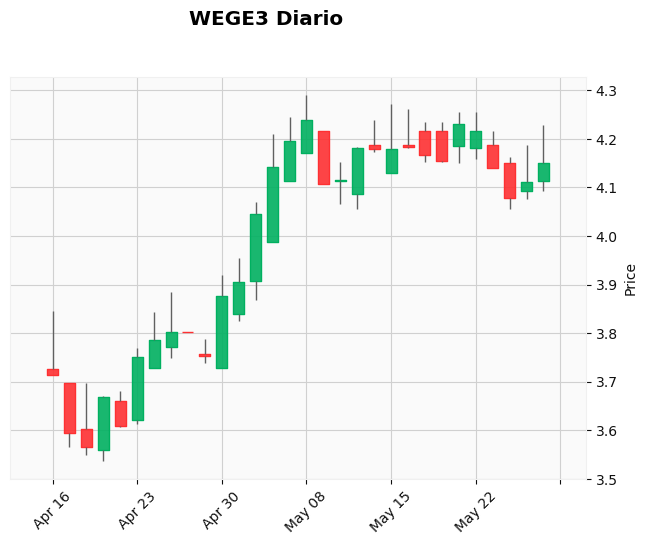

In [14]:
# plote o gráfico de vela
mpl.plot(
    df[70:100],
    type="candle", 
    title = "WEGE3 Diario",  
    style="yahoo"
    )


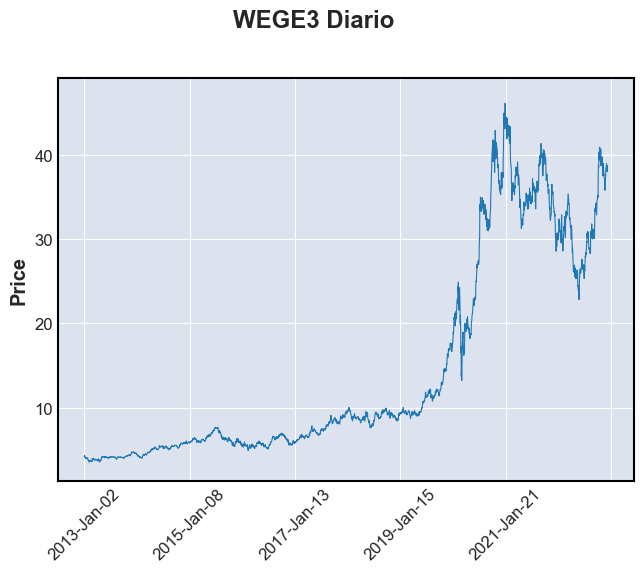

In [15]:
# plote o gráfico de linha
mpl.plot(
    df,
    title = "WEGE3 Diario",  
    type="line", 
    )


## Padrões de Vela

In [16]:
# importe as bibliotecas necessárias
import talib
from talib.abstract import *
from talib import MA_Type

In [17]:
print('There are {} TA-Lib functions!'.format(len(talib.get_functions())))

There are 158 TA-Lib functions!


As funções disponíveis podem ser consultadas em https://github.com/fja05680/TA-Lib-tutorial

In [18]:
# imprime uma função em específico
print(CDLDOJI)

CDLDOJI([input_arrays])

Doji (Pattern Recognition)

Inputs:
    prices: ['open', 'high', 'low', 'close']
Outputs:
    integer (values are -100, 0 or 100)


In [19]:
# imprime atributo info da função
print(CDLDOJI.info)

{'name': 'CDLDOJI', 'group': 'Pattern Recognition', 'display_name': 'Doji', 'function_flags': ['Output is a candlestick'], 'input_names': OrderedDict([('prices', ['open', 'high', 'low', 'close'])]), 'parameters': OrderedDict(), 'output_flags': OrderedDict([('integer', ['Line'])]), 'output_names': ['integer']}


In [20]:
# imprime o nome dos parâmetro
print(CDLDOJI.input_names)

OrderedDict([('prices', ['open', 'high', 'low', 'close'])])


### Exemplo 1

In [21]:
# estima o padrão candle doji
cdldoji = talib.CDLDOJI(open=df.open, high=df.high, low=df.low, close=df.close)
cdldoji.value_counts()


0      2108
100     376
dtype: int64

# PLOTANDO GRAFICO '100' '0' '-100'

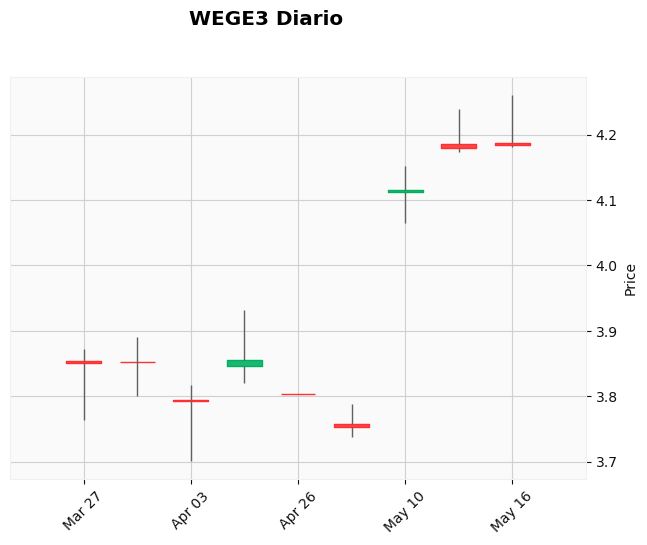

In [22]:
# obtenha uma máscara booleana para encontrar os dias em que ocorreram o padrão
is_doji = cdldoji == 100

# filtre o dataframe com os dias em que o padrão ocorreu
df.loc[is_doji]
mpl.plot(
    df[50:100].loc[is_doji],
    type="candle", 
    title = "WEGE3 Diario",  
    style="yahoo"
    )

### Exemplo 2

In [23]:
#Padrao Doji Star
print(CDLDOJISTAR)

CDLDOJISTAR([input_arrays])

Doji Star (Pattern Recognition)

Inputs:
    prices: ['open', 'high', 'low', 'close']
Outputs:
    integer (values are -100, 0 or 100)


In [24]:
talib.CDLDOJISTAR(df.open, df.high, df.low, df.close).value_counts()


 0      2430
-100      28
 100      26
dtype: int64

Atenção! Existem padrões de vela que possuem possuem dois valores de saída (além do 0): 100 e -100. Consultar https://stackoverflow.com/questions/36820189/what-are-the-numbers-such-as-100-100-200-200-and-etc-when-using-ta-lib-i para procurar entender melhor a diferença dos valores obtidos

0: Indica que o padrão não foi identificado.
-100: Indica que o padrão de baixa foi identificado. Isso sugere uma possível reversão de alta para baixa.
100: Indica que o padrão de alta foi identificado. Isso sugere uma possível reversão de baixa para alta.


# Media do volume 

In [38]:
medias_volume = {}
for nome_acao, df in dfs_diario.items():
        media = df["volume"].mean()
        medias_volume[nome_acao]=media
        print(f"Calculo da media da  {nome_acao}:")
        print(f"{media}")
        print()
        
print(f"da ultima açao {media}")   

Calculo da media da  ABEV3:
17223701.008454107

Calculo da media da  B3SA3:
37238836.09098229

Calculo da media da  BBAS3:
11542184.495169083

Calculo da media da  BBDC4:
29638868.89009662

Calculo da media da  ELET3:
4297320.65942029

Calculo da media da  ITSA4:
26887556.976650562

Calculo da media da  ITUB4:
26258189.034219

Calculo da media da  PETR3:
15194554.949275363

Calculo da media da  PETR4:
58533268.23510467

Calculo da media da  VALE3:
16330454.655797102

Calculo da media da  WEGE3:
6511128.2769726245

da ultima açao 6511128.2769726245


# Projeção no Volume Médio

In [ ]:
def projeta_volumeMedi(df, k):
    df_vol = pd.DataFrame(columns=['date', 'open', 'high', 'low', 'close', 'volume'])
    
    i = 0
    while i < len(df):
        volume = 0
        j = i
        while volume < k and j < len(df):
            #k media do volume
            volume += df['volume'][j]
            j += 1
        # Agrupar os vários candles em um só
        novo_candle = {
            'date': df.index[i],
            'open': df['open'][i],
            'high': max(df['high'][i:j]),
            'low': min(df['low'][i:j]),
            'close': df['close'][j-1],
            'volume': volume
        }
        i = j
    
        df_dict = pd.DataFrame([novo_candle])
        df_vol = pd.concat([df_vol, df_dict], ignore_index=True)

    return df_vol

## Top 10 padrões de vela

In [25]:
# construa lista com os padrões de vela que serão utilizados no trabalho
patterns = ["CDLENGULFING", "CDLPIERCING", "CDLEVENINGSTAR", "CDLHAMMER", "CDLDARKCLOUDCOVER", "CDLHARAMI", 
            "CDLHANGINGMAN", "CDLMORNINGSTAR", "CDLDOJI", "CDLDOJISTAR"]

#aqui esta indexiando valor inteiro no dataframe

In [26]:
# imprima os possíveis valores de cada um dos padrões
for nome_acao, df in dfs_diario.items():
    print(f"Valores dos padrões para {nome_acao}:")
    for pattern in patterns:
        func = getattr(talib, pattern)
        result = func(df['open'], df['high'], df['low'], df['close'])
        print(pattern)
        print(result.value_counts())
        print()



Valores dos padrões para ABEV3:
CDLENGULFING
 0      2295
-100     103
 100      86
dtype: int64

CDLPIERCING
0      2470
100      14
dtype: int64

CDLEVENINGSTAR
 0      2469
-100      15
dtype: int64

CDLHAMMER
0      2450
100      34
dtype: int64

CDLDARKCLOUDCOVER
 0      2477
-100       7
dtype: int64

CDLHARAMI
 0      2288
-100     100
 100      96
dtype: int64

CDLHANGINGMAN
 0      2443
-100      41
dtype: int64

CDLMORNINGSTAR
0      2468
100      16
dtype: int64

CDLDOJI
0      2115
100     369
dtype: int64

CDLDOJISTAR
 0      2434
-100      25
 100      25
dtype: int64

Valores dos padrões para B3SA3:
CDLENGULFING
 0      2304
 100      93
-100      87
dtype: int64

CDLPIERCING
0      2478
100       6
dtype: int64

CDLEVENINGSTAR
 0      2473
-100      11
dtype: int64

CDLHAMMER
0      2443
100      41
dtype: int64

CDLDARKCLOUDCOVER
 0      2470
-100      14
dtype: int64

CDLHARAMI
 0      2293
 100      96
-100      95
dtype: int64

CDLHANGINGMAN
 0      2445
-100      3

In [27]:
import pandas as concat
# compute os padrões sobre os dados
for nome_acao, df in dfs_diario.items():
    for pattern in patterns:
        func = getattr(talib, pattern)
        result = func(df['open'], df['high'], df['low'], df['close'])
        #tentar indexar;#https://pandas.pydata.org/docs/reference/api/pandas.concat.html
        df[pattern] = result
        df.columns = map(str.lower, df.columns)
        
        
        



df



,open,high,low,close,adj_close,volume,cdlengulfing,cdlpiercing,cdleveningstar,cdlhammer,cdldarkcloudcover,cdlharami,cdlhangingman,cdlmorningstar,cdldoji,cdldojistar
date,,,,,,,,,,,,,,,,
2013-01-02,4.032544,4.215976,4.026627,4.162721,3.424982,1875224,0,0,0,0,0,0,0,0,0,0
2013-01-03,4.142011,4.394970,4.125739,4.349112,3.578339,10171096,0,0,0,0,0,0,0,0,0,0
2013-01-04,4.332840,4.349112,4.223372,4.297337,3.535739,4154020,0,0,0,0,0,0,0,0,0,0
2013-01-07,4.260355,4.285502,4.218934,4.245562,3.493141,2678312,0,0,0,0,0,0,0,0,0,0
2013-01-08,4.233727,4.244082,4.075443,4.075443,3.353171,3984344,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,39.160000,39.380001,38.070000,38.500000,38.228981,9476400,0,0,0,0,-100,0,0,0,0,0
2022-12-26,38.330002,38.740002,37.910000,38.189999,37.921162,2339100,0,0,0,0,0,0,0,0,0,0
2022-12-27,38.500000,38.520000,37.779999,38.009998,37.742432,4735700,0,0,0,0,0,0,0,0,0,0


In [28]:
# double checking se os padrões foram computados corretamente
contagem = {}

for pattern in patterns:
    func = getattr(talib, pattern)
    result = func(df['open'], df['high'], df['low'], df['close'])
    
    # conte as ocorrências de cada padrão
    contagem[pattern] = result.value_counts()


df_contagem = pd.concat(contagem, axis=1)
df_contagem = df_contagem.fillna(0)
df_contagem

,CDLENGULFING,CDLPIERCING,CDLEVENINGSTAR,CDLHAMMER,CDLDARKCLOUDCOVER,CDLHARAMI,CDLHANGINGMAN,CDLMORNINGSTAR,CDLDOJI,CDLDOJISTAR
0,2266,2476.0,2471.0,2459.0,2472.0,2306,2458.0,2470.0,2108.0,2430
-100,143,0.0,13.0,0.0,12.0,69,26.0,0.0,0.0,28
100,75,8.0,0.0,25.0,0.0,109,0.0,14.0,376.0,26


## Labels

Serão construídos 5 rótulos binários, com informação se os próximos 5 dias subiram ou ou cairam comparado ao dia atual. Assim, tem-se o rótulo 1_ahead que compara o fechamento do (dia atual + 1) com a abertura do dia atual. Será 1 (classe positiva) se a ação do (dia atual + 1) subiu comparado ao dia atual. Subir significa que o fechamento do (dia atual + 1) é maior que a abertura do dia atual. Caso contrário será 0 (classe negativa), indicando que a ação do (dia atual + 1) caiu comparado ao dia atual. Similarmente, construiremos os rótulos 2_ahead, 3_ahead, 4_ahead e 5_ahead.

In [29]:
# Loop para percorrer todos os DataFrames
for nome_acao, df in dfs_diario.items():
    print(f"Calculando colunas '1_ahead', '2_ahead', '3_ahead', '4_ahead' e '5_ahead' para {nome_acao}...")
    
    df['1_ahead'] = 0
    for i in range(len(df) - 1):
        df.loc[df.index[i], '1_ahead'] = int(df.iloc[i+1].close >= df.iloc[i].open)
        
    df['2_ahead'] = 0
    for i in range(len(df) - 2):
        df.loc[df.index[i], '2_ahead'] = int(df.iloc[i+2].close >= df.iloc[i].open)
        
    df['3_ahead'] = 0
    for i in range(len(df) - 3):
        df.loc[df.index[i], '3_ahead'] = int(df.iloc[i+3].close >= df.iloc[i].open)
        
    df['4_ahead'] = 0
    for i in range(len(df) - 4):
        df.loc[df.index[i], '4_ahead'] = int(df.iloc[i+4].close >= df.iloc[i].open)
        
    df['5_ahead'] = 0
    for i in range(len(df) - 5):
        df.loc[df.index[i], '5_ahead'] = int(df.iloc[i+5].close >= df.iloc[i].open)

    print("Concluído.")


Calculando colunas '1_ahead', '2_ahead', '3_ahead', '4_ahead' e '5_ahead' para ABEV3...
Concluído.
Calculando colunas '1_ahead', '2_ahead', '3_ahead', '4_ahead' e '5_ahead' para B3SA3...
Concluído.
Calculando colunas '1_ahead', '2_ahead', '3_ahead', '4_ahead' e '5_ahead' para BBAS3...
Concluído.
Calculando colunas '1_ahead', '2_ahead', '3_ahead', '4_ahead' e '5_ahead' para BBDC4...
Concluído.
Calculando colunas '1_ahead', '2_ahead', '3_ahead', '4_ahead' e '5_ahead' para ELET3...
Concluído.
Calculando colunas '1_ahead', '2_ahead', '3_ahead', '4_ahead' e '5_ahead' para ITSA4...
Concluído.
Calculando colunas '1_ahead', '2_ahead', '3_ahead', '4_ahead' e '5_ahead' para ITUB4...
Concluído.
Calculando colunas '1_ahead', '2_ahead', '3_ahead', '4_ahead' e '5_ahead' para PETR3...
Concluído.
Calculando colunas '1_ahead', '2_ahead', '3_ahead', '4_ahead' e '5_ahead' para PETR4...
Concluído.
Calculando colunas '1_ahead', '2_ahead', '3_ahead', '4_ahead' e '5_ahead' para VALE3...
Concluído.
Calculando

In [30]:
df

,open,high,low,close,adj_close,volume,cdlengulfing,cdlpiercing,cdleveningstar,cdlhammer,...,cdlharami,cdlhangingman,cdlmorningstar,cdldoji,cdldojistar,1_ahead,2_ahead,3_ahead,4_ahead,5_ahead
date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,4.032544,4.215976,4.026627,4.162721,3.424982,1875224,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
2013-01-03,4.142011,4.394970,4.125739,4.349112,3.578339,10171096,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2013-01-04,4.332840,4.349112,4.223372,4.297337,3.535739,4154020,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-01-07,4.260355,4.285502,4.218934,4.245562,3.493141,2678312,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-01-08,4.233727,4.244082,4.075443,4.075443,3.353171,3984344,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,39.160000,39.380001,38.070000,38.500000,38.228981,9476400,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-12-26,38.330002,38.740002,37.910000,38.189999,37.921162,2339100,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2022-12-27,38.500000,38.520000,37.779999,38.009998,37.742432,4735700,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [31]:
for nome_acao, df in dfs_diario.items():
    df = df.drop(df.index[-5:])
df

,open,high,low,close,adj_close,volume,cdlengulfing,cdlpiercing,cdleveningstar,cdlhammer,...,cdlharami,cdlhangingman,cdlmorningstar,cdldoji,cdldojistar,1_ahead,2_ahead,3_ahead,4_ahead,5_ahead
date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,4.032544,4.215976,4.026627,4.162721,3.424982,1875224,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
2013-01-03,4.142011,4.394970,4.125739,4.349112,3.578339,10171096,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2013-01-04,4.332840,4.349112,4.223372,4.297337,3.535739,4154020,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-01-07,4.260355,4.285502,4.218934,4.245562,3.493141,2678312,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-01-08,4.233727,4.244082,4.075443,4.075443,3.353171,3984344,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-16,36.990002,37.549999,36.759998,37.450001,37.132401,12123500,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
2022-12-19,37.689999,38.430000,37.650002,38.119999,37.851654,6603400,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
2022-12-20,38.110001,39.139999,38.110001,38.430000,38.159477,7623900,0,0,0,0,...,0,0,0,0,0,1,1,1,1,0


# Juntando todos os dataSetes

In [32]:
import pandas as pd

df_juntar = pd.DataFrame()

for nome_acao, df in dfs_diario.items():
    df_juntar = pd.concat([df_juntar, df])



df_juntar

,open,high,low,close,adj_close,volume,cdlengulfing,cdlpiercing,cdleveningstar,cdlhammer,...,cdlharami,cdlhangingman,cdlmorningstar,cdldoji,cdldojistar,1_ahead,2_ahead,3_ahead,4_ahead,5_ahead
date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,16.980267,17.050261,16.768290,16.806286,11.399805,1126114,0,0,0,0,...,0,0,0,0,0,1,0,1,1,1
2013-01-03,16.942270,17.114254,16.820284,17.104256,11.601920,1032105,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
2013-01-04,17.104256,17.104256,16.798286,16.822285,11.410660,1488651,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2013-01-07,16.802286,17.018265,16.798286,17.016264,11.542233,1223124,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
2013-01-08,16.820284,17.036263,16.798286,16.996265,11.528666,1103112,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,39.160000,39.380001,38.070000,38.500000,38.228981,9476400,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-12-26,38.330002,38.740002,37.910000,38.189999,37.921162,2339100,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2022-12-27,38.500000,38.520000,37.779999,38.009998,37.742432,4735700,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


## Computando a quantidade de dias positivos e negativos da ação

In [33]:
dias_positivos = df[df['close'] >= df['open']].shape[0]
dias_negativos = df[df['close'] < df['open']].shape[0]

total_dias = df.shape[0]

print("Total de dias:", total_dias)

print("Dias positivos:", dias_positivos)
print("Dias negativos:", dias_negativos)
df.shape

Total de dias: 2484
Dias positivos: 1223
Dias negativos: 1261


(2484, 21)

## Pearson correlation

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [35]:
df.info()
print("Data Frame Juntar")
df_juntar.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2484 entries, 2013-01-02 to 2022-12-29
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   open               2484 non-null   float64
 1   high               2484 non-null   float64
 2   low                2484 non-null   float64
 3   close              2484 non-null   float64
 4   adj_close          2484 non-null   float64
 5   volume             2484 non-null   int64  
 6   cdlengulfing       2484 non-null   int32  
 7   cdlpiercing        2484 non-null   int32  
 8   cdleveningstar     2484 non-null   int32  
 9   cdlhammer          2484 non-null   int32  
 10  cdldarkcloudcover  2484 non-null   int32  
 11  cdlharami          2484 non-null   int32  
 12  cdlhangingman      2484 non-null   int32  
 13  cdlmorningstar     2484 non-null   int32  
 14  cdldoji            2484 non-null   int32  
 15  cdldojistar        2484 non-null   int32  
 16  1_ahea

In [36]:
df.columns

Index(['open', 'high', 'low', 'close', 'adj_close', 'volume', 'cdlengulfing',
       'cdlpiercing', 'cdleveningstar', 'cdlhammer', 'cdldarkcloudcover',
       'cdlharami', 'cdlhangingman', 'cdlmorningstar', 'cdldoji',
       'cdldojistar', '1_ahead', '2_ahead', '3_ahead', '4_ahead', '5_ahead'],
      dtype='object')

In [37]:
# construa o conjunto de features q se deseja trabalhar
ffs = ['cdlengulfing',
       'cdlpiercing', 'cdleveningstar', 'cdlhammer', 'cdldarkcloudcover',
       'cdlharami', 'cdlhangingman', 'cdlmorningstar', 'cdldoji',
       'cdldojistar', '1_ahead', '2_ahead', '3_ahead', '4_ahead', '5_ahead']

In [38]:
#df[ffs].corr()
df_juntar[ffs].corr()

,cdlengulfing,cdlpiercing,cdleveningstar,cdlhammer,cdldarkcloudcover,cdlharami,cdlhangingman,cdlmorningstar,cdldoji,cdldojistar,1_ahead,2_ahead,3_ahead,4_ahead,5_ahead
cdlengulfing,1.000000,0.002827,0.080661,0.004232,-0.003081,0.002285,-0.002190,0.034981,0.016372,-0.000159,0.200012,0.151201,0.127980,0.117436,0.106408
cdlpiercing,0.002827,1.000000,0.004857,-0.008656,0.004285,-0.003177,0.007700,-0.004564,-0.025458,0.000221,0.046772,0.042786,0.037362,0.026116,0.027230
cdleveningstar,0.080661,0.004857,1.000000,0.010694,-0.005294,0.003925,-0.009514,0.005639,0.031454,-0.000272,0.068325,0.051792,0.042252,0.030768,0.027990
cdlhammer,0.004232,-0.008656,0.010694,1.000000,0.009434,0.020887,0.010255,-0.010048,0.010604,0.037571,-0.019211,-0.013218,-0.002958,-0.002883,-0.004636
cdldarkcloudcover,-0.003081,0.004285,-0.005294,0.009434,1.000000,0.003462,-0.008392,0.004974,0.027745,-0.000240,0.052750,0.042497,0.036848,0.029010,0.026922
cdlharami,0.002285,-0.003177,0.003925,0.020887,0.003462,1.000000,0.011605,-0.003688,0.026510,0.000178,0.023700,0.017069,0.014389,0.002621,0.005960
cdlhangingman,-0.002190,0.007700,-0.009514,0.010255,-0.008392,0.011605,1.000000,0.008939,-0.031712,0.036940,0.001485,0.005427,0.008690,0.008252,0.005948
cdlmorningstar,0.034981,-0.004564,0.005639,-0.010048,0.004974,-0.003688,0.008939,1.000000,-0.029553,0.000256,0.057168,0.041459,0.037571,0.030696,0.035683
cdldoji,0.016372,-0.025458,0.031454,0.010604,0.027745,0.026510,-0.031712,-0.029553,1.000000,-0.008662,0.005716,0.002894,-0.000210,0.000492,0.005357
cdldojistar,-0.000159,0.000221,-0.000272,0.037571,-0.000240,0.000178,0.036940,0.000256,-0.008662,1.000000,0.002485,0.007535,0.007075,0.011136,0.007119


### Basic Seaborn Heatmap

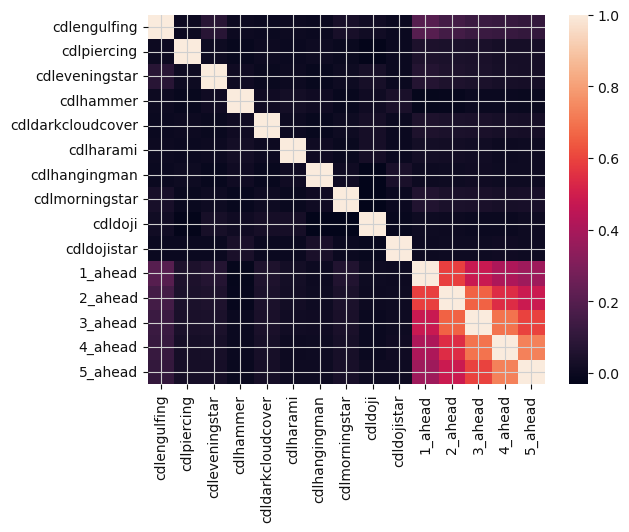

In [39]:
#sns.heatmap(df[ffs].corr());
sns.heatmap(df_juntar[ffs].corr());

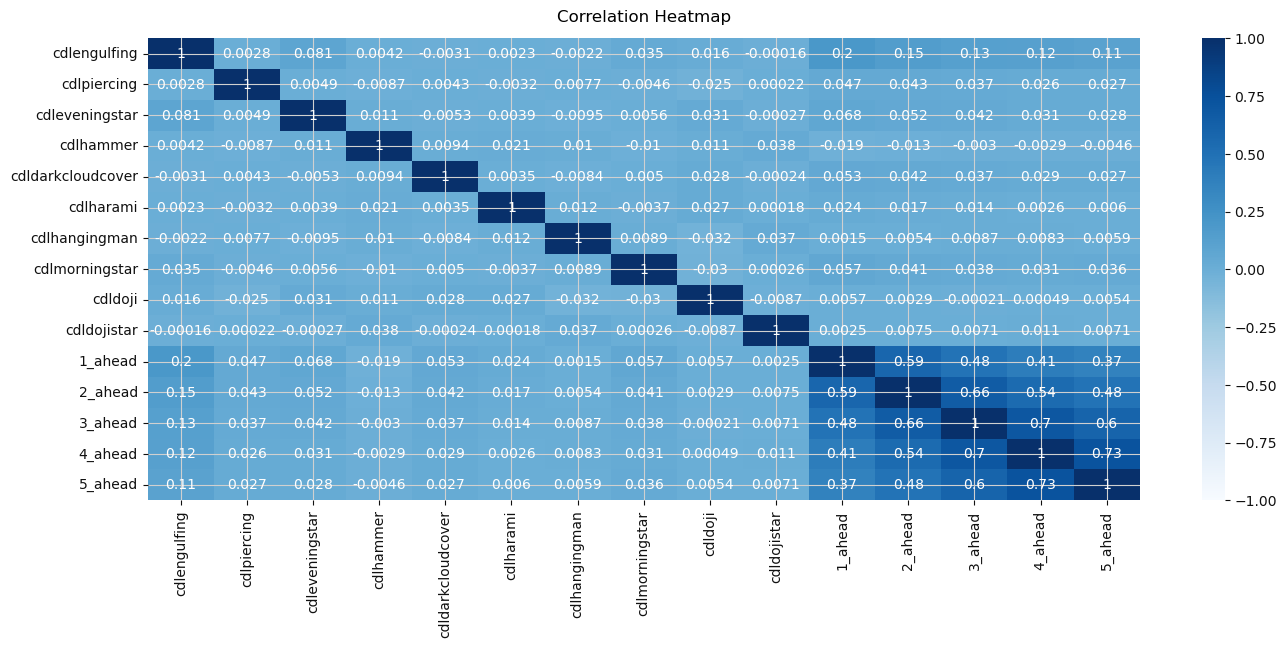

In [40]:
# Increase the size of the heatmap
plt.figure(figsize=(16, 6))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title)
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True 
## to display the correlation values on the heatmap.
#heatmap = sns.heatmap(df[ffs].corr(), vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap = sns.heatmap(df_juntar[ffs].corr(), vmin=-1, vmax=1, annot=True, cmap='Blues')

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## Projeção no Volume

In [41]:
def projeta_volume(df, k):
    df_vol = pd.DataFrame(columns=['date', 'open', 'high', 'low', 'close', 'volume'])
    
    i = 0
    while i < len(df):
        volume = 0
        j = i
        while volume < k and j < len(df):
            #k media do volume
            volume += df['volume'][j]
            j += 1
        # Agrupar os vários candles em um só
        novo_candle = {
            'date': df.index[i],
            'open': df['open'][i],
            'high': max(df['high'][i:j]),
            'low': min(df['low'][i:j]),
            'close': df['close'][j-1],
            'volume': volume
        }
        i = j
    
        df_dict = pd.DataFrame([novo_candle])
        df_vol = pd.concat([df_vol, df_dict], ignore_index=True)

    return df_vol

In [42]:
df.volume.describe()

count    2.484000e+03
mean     6.511128e+06
std      4.997066e+06
min      0.000000e+00
25%      3.679390e+06
50%      5.434850e+06
75%      7.999350e+06
max      1.093875e+08
Name: volume, dtype: float64

In [43]:
df_vol = projeta_volume(df,200_000_000)
df_vol

,date,open,high,low,close,volume
0,2013-01-02,4.032544,4.394970,3.523668,3.875739,201596720
1,2013-03-20,3.884615,4.289940,3.536982,4.180473,202319364
2,2013-06-05,4.186390,4.272189,3.865384,4.128698,200254184
3,2013-08-28,4.122781,4.505917,3.940828,4.460059,201346600
4,2013-11-21,4.434911,4.821005,3.961538,4.245562,203130564
...,...,...,...,...,...,...
74,2022-07-08,27.610001,31.000000,25.010000,30.340000,206020900
75,2022-08-16,30.340000,32.230000,27.600000,30.570000,204179300
76,2022-09-26,30.570000,39.410000,29.580000,38.470001,201820200
77,2022-10-31,37.700001,42.419998,36.430000,39.000000,200264800


# pega media do volume de cada açao, e depois projeta na media do volume.calcular de todass, gerar unico dataframe.